<b>Batch Training Basic Dense Neural NW on trimagi dataset for Kaggle competition</b>

In this code was created as a simple test on how to form a dense Neural network. The dataset used was from Kaggle competition called Teenmagi-2022. **1.3 million images and 1000 classes.** The network is not efficient but used as a means to study different techniques.

**Note**: The dataset is loaded processed in earlier codes.

[Kaggle Teenmagi-2022](https://www.kaggle.com/competitions/teenmagi-2022)

In [1]:
#### Dense Neural NW; Incremental Training using multiple Batches in For loop; 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from numpy import load
import gc


#========== Neural NW
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential


print("Libraries Loaded")

Libraries Loaded


In [6]:
dict_Validation = load('../input/processed-total-dataset/Processed_Val.npz')
Val = dict_Validation['arr_0']
Val = Val[:,:,:,0]
#Scale Validation data between 0 and 1, Others were already scaled.
Val = (Val - np.min(Val)) / (np.max(Val) - np.min(Val)).astype(np.float32)

del dict_Validation

def Data_Loader(Batch_number):
    path ='../input/processed-batches/Batch' + str(Batch_number) 
    dict_Batch_X = load(path + '_X.npz')
    dict_Batch_Y = load(path + '_Y.npz')
    Xa = dict_Batch_X['arr_0']
    Ya = dict_Batch_Y['arr_0']
    print("Batch"+ str(Batch_number)+":", "Training Data Dim", Xa.shape,"  Label Data Dim:", Ya.shape)
    del dict_Batch_X
    del dict_Batch_Y
    return Xa, Ya



#Training_Batch = [1,2,3,4,5,6,7,8,9,10,11,12]
Training_Batch = [1]
Test_Batch = 10


X_TEST, Y_TEST =  Data_Loader(Test_Batch)
X_TEST = X_TEST[:,:,:,0]  #single channel mode


X, Y = Data_Loader(1)
X = X[:,:,:,0]  #single channel mode


print("Test Dataset's Dimensions:" ,X_TEST.shape,"class Dim: ", Y_TEST.shape)
print("Training Dataset's Dimensions:" ,X.shape,"class Dim: ", Y.shape)
print("Validation Dataset's Dimensions:" ,Val.shape)
print()


#Split Test images to Validation and Test
X_Tst, X_Val, Y_Tst, Y_Val = train_test_split(X_TEST, Y_TEST, test_size=0.5, random_state=0, stratify=Y_TEST)
print("Test Dataset's Dimensions:" ,X_Tst.shape,"class Dim: ", Y_Tst.shape)

#Convert to one-hot
Y_Val=tf.one_hot(Y_Val, 1000)
Y_Tst=tf.one_hot(Y_Tst, 1000)
Y=tf.one_hot(Y, 1000)


gc.collect()

Batch10: Training Data Dim (100000, 8, 8, 3)   Label Data Dim: (100000,)
Batch1: Training Data Dim (100000, 8, 8, 3)   Label Data Dim: (100000,)
Test Dataset's Dimensions: (100000, 8, 8) class Dim:  (100000,)
Training Dataset's Dimensions: (100000, 8, 8) class Dim:  (100000,)
Validation Dataset's Dimensions: (48238, 8, 8)

Test Dataset's Dimensions: (50000, 8, 8) class Dim:  (50000,)


21345

**Create a Sequential model**

In [3]:
model = Sequential()

model.add(keras.layers.Flatten(input_shape=(8,8)))  # Flatten input image to a vector


# Add a full connected layers
model.add(keras.layers.Dense(10240, activation='relu'))
model.add(keras.layers.Dense(5120, activation='relu'))
model.add(keras.layers.Dense(2560, activation='relu'))
model.add(keras.layers.Dense(1280, activation='relu'))

model.add(keras.layers.Dense(1000, activation='softmax')) # Output layer

#tf.keras.optimizers.SGD(learning_rate=0.01) # Learning rate #FOR GPU KERNEL

#loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction="auto", name="sparse_categorical_crossentropy")
loss_fn=tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction="auto",
    name="categorical_crossentropy")

init_learning_rate = 0.1
decay_rate = init_learning_rate / 15

#tf.keras.optimizers.Adam(learning_rate=0.2, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False, name='Adam')  #Adam Optimiser
opt = tf.keras.optimizers.SGD(lr=init_learning_rate, momentum=0.9, decay=decay_rate)
#model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

#model.compile(loss=loss_fn,optimizer = opt, metrics=['accuracy'])
model.compile(loss='kullback_leibler_divergence', optimizer=opt, metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model.compile(optimizer='sgd', loss='mean_squared_logarithmic_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10240)             665600    
_________________________________________________________________
dense_1 (Dense)              (None, 5120)              52433920  
_________________________________________________________________
dense_2 (Dense)              (None, 2560)              13109760  
_________________________________________________________________
dense_3 (Dense)              (None, 1280)              3278080   
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1281000   
Total params: 70,768,360
Trainable params: 70,768,360
Non-trainable params: 0
____________________________________________

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


**Train the model on all datasets one by one**

Learning rate scheduler is used to reduce learning rate as the training progresses.

Batch1: Training Data Dim (100000, 8, 8, 3)   Label Data Dim: (100000,)


2022-07-19 11:23:22.854252: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
667/667 [==============================] - 16s 22ms/step - loss: 6.9000 - accuracy: 0.0011 - val_loss: 6.8913 - val_accuracy: 0.0021
Epoch 2/15
667/667 [==============================] - 14s 22ms/step - loss: 6.8718 - accuracy: 0.0021 - val_loss: 6.8346 - val_accuracy: 0.0026
Epoch 3/15
667/667 [==============================] - 15s 22ms/step - loss: 6.7980 - accuracy: 0.0032 - val_loss: 6.7756 - val_accuracy: 0.0033
Epoch 4/15
667/667 [==============================] - 14s 22ms/step - loss: 6.7564 - accuracy: 0.0037 - val_loss: 6.7546 - val_accuracy: 0.0049
Epoch 5/15
667/667 [==============================] - 14s 22ms/step - loss: 6.7319 - accuracy: 0.0044 - val_loss: 6.7367 - val_accuracy: 0.0052
Epoch 6/15
667/667 [==============================] - 14s 22ms/step - loss: 6.7117 - accuracy: 0.0049 - val_loss: 6.7214 - val_accuracy: 0.0057
Epoch 7/15
667/667 [==============================] - 14s 22ms/step - loss: 6.6942 - accuracy: 0.0060 - val_loss: 6.7100 - val_accuracy:

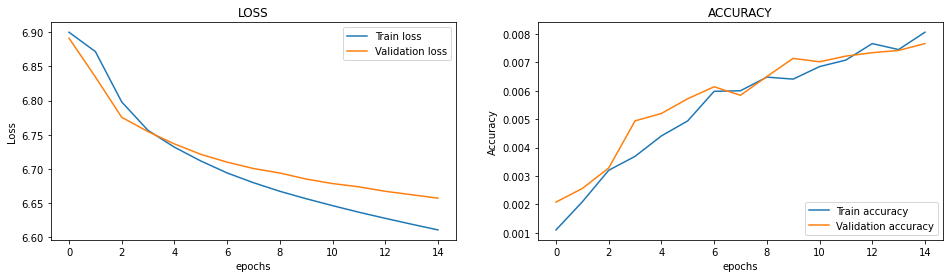




Batch2: Training Data Dim (100000, 8, 8, 3)   Label Data Dim: (100000,)
Epoch 1/15
667/667 [==============================] - 14s 22ms/step - loss: 6.6543 - accuracy: 0.0074 - val_loss: 6.6454 - val_accuracy: 0.0077
Epoch 2/15
667/667 [==============================] - 14s 22ms/step - loss: 6.6367 - accuracy: 0.0076 - val_loss: 6.6391 - val_accuracy: 0.0082
Epoch 3/15
667/667 [==============================] - 14s 22ms/step - loss: 6.6244 - accuracy: 0.0080 - val_loss: 6.6339 - val_accuracy: 0.0085
Epoch 4/15
667/667 [==============================] - 14s 22ms/step - loss: 6.6140 - accuracy: 0.0081 - val_loss: 6.6309 - val_accuracy: 0.0085
Epoch 5/15
667/667 [==============================] - 14s 22ms/step - loss: 6.6055 - accuracy: 0.0086 - val_loss: 6.6271 - val_accuracy: 0.0087
Epoch 6/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5976 - accuracy: 0.0087 - val_loss: 6.6243 - val_accuracy: 0.0086
Epoch 7/15
667/667 [==============================] - 15s 23m

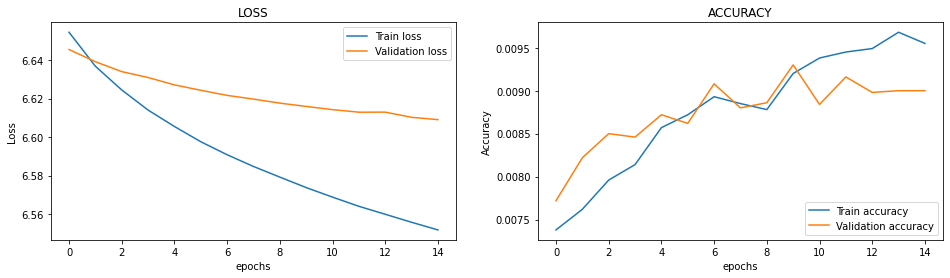




Batch3: Training Data Dim (100000, 8, 8, 3)   Label Data Dim: (100000,)
Epoch 1/15
667/667 [==============================] - 14s 22ms/step - loss: 6.6059 - accuracy: 0.0083 - val_loss: 6.6014 - val_accuracy: 0.0093
Epoch 2/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5925 - accuracy: 0.0087 - val_loss: 6.5984 - val_accuracy: 0.0091
Epoch 3/15
667/667 [==============================] - 15s 22ms/step - loss: 6.5834 - accuracy: 0.0087 - val_loss: 6.5960 - val_accuracy: 0.0094
Epoch 4/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5761 - accuracy: 0.0089 - val_loss: 6.5943 - val_accuracy: 0.0091
Epoch 5/15
667/667 [==============================] - 15s 22ms/step - loss: 6.5697 - accuracy: 0.0090 - val_loss: 6.5929 - val_accuracy: 0.0095
Epoch 6/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5641 - accuracy: 0.0091 - val_loss: 6.5921 - val_accuracy: 0.0094
Epoch 7/15
667/667 [==============================] - 14s 22m

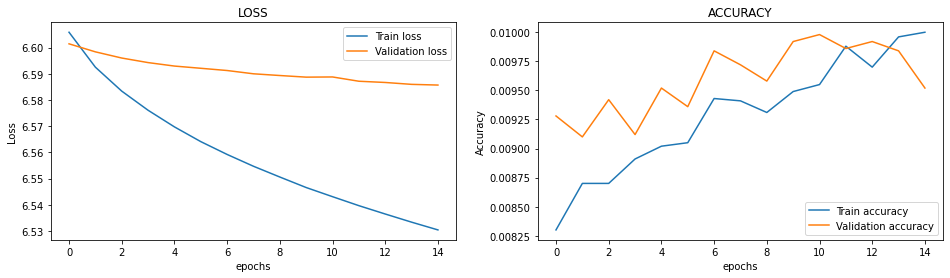




Batch4: Training Data Dim (100000, 8, 8, 3)   Label Data Dim: (100000,)
Epoch 1/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5815 - accuracy: 0.0092 - val_loss: 6.5792 - val_accuracy: 0.0102
Epoch 2/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5708 - accuracy: 0.0093 - val_loss: 6.5767 - val_accuracy: 0.0101
Epoch 3/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5633 - accuracy: 0.0095 - val_loss: 6.5744 - val_accuracy: 0.0103
Epoch 4/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5572 - accuracy: 0.0097 - val_loss: 6.5732 - val_accuracy: 0.0100
Epoch 5/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5521 - accuracy: 0.0098 - val_loss: 6.5719 - val_accuracy: 0.0101
Epoch 6/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5474 - accuracy: 0.0100 - val_loss: 6.5712 - val_accuracy: 0.0102
Epoch 7/15
667/667 [==============================] - 14s 22m

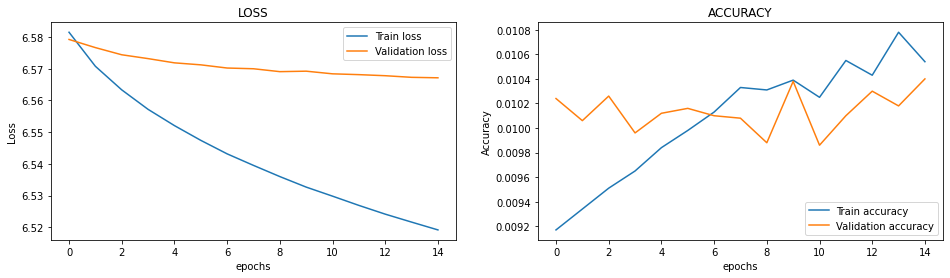




Batch5: Training Data Dim (100000, 8, 8, 3)   Label Data Dim: (100000,)
Epoch 1/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5650 - accuracy: 0.0100 - val_loss: 6.5628 - val_accuracy: 0.0104
Epoch 2/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5562 - accuracy: 0.0099 - val_loss: 6.5607 - val_accuracy: 0.0104
Epoch 3/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5500 - accuracy: 0.0103 - val_loss: 6.5596 - val_accuracy: 0.0106
Epoch 4/15
667/667 [==============================] - 15s 23ms/step - loss: 6.5446 - accuracy: 0.0102 - val_loss: 6.5586 - val_accuracy: 0.0108
Epoch 5/15
667/667 [==============================] - 15s 22ms/step - loss: 6.5404 - accuracy: 0.0106 - val_loss: 6.5579 - val_accuracy: 0.0110
Epoch 6/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5364 - accuracy: 0.0105 - val_loss: 6.5574 - val_accuracy: 0.0108
Epoch 7/15
667/667 [==============================] - 15s 23m

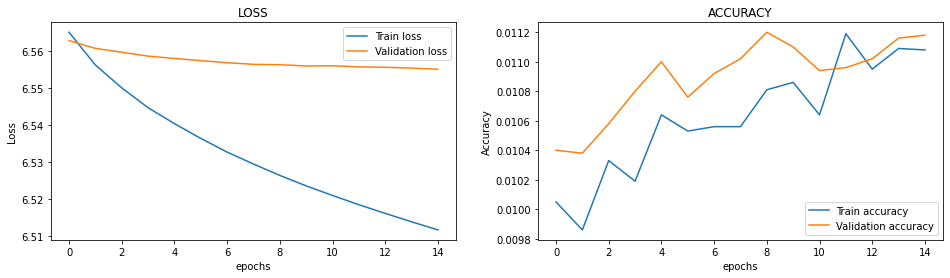




Batch6: Training Data Dim (100000, 8, 8, 3)   Label Data Dim: (100000,)
Epoch 1/15
667/667 [==============================] - 15s 22ms/step - loss: 6.5543 - accuracy: 0.0106 - val_loss: 6.5519 - val_accuracy: 0.0111
Epoch 2/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5466 - accuracy: 0.0108 - val_loss: 6.5503 - val_accuracy: 0.0112
Epoch 3/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5408 - accuracy: 0.0111 - val_loss: 6.5504 - val_accuracy: 0.0109
Epoch 4/15
667/667 [==============================] - 15s 22ms/step - loss: 6.5360 - accuracy: 0.0113 - val_loss: 6.5484 - val_accuracy: 0.0112
Epoch 5/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5318 - accuracy: 0.0111 - val_loss: 6.5481 - val_accuracy: 0.0114
Epoch 6/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5282 - accuracy: 0.0113 - val_loss: 6.5475 - val_accuracy: 0.0111
Epoch 7/15
667/667 [==============================] - 14s 22m

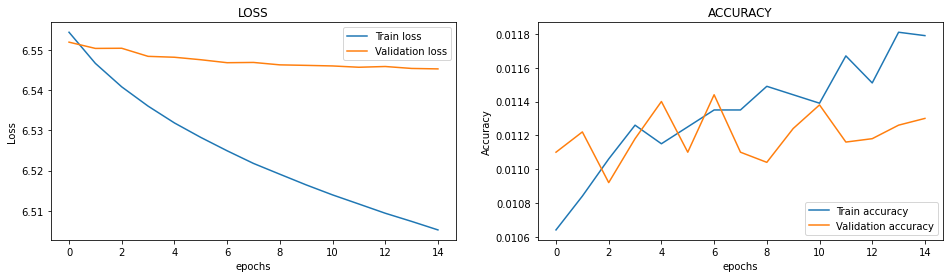




Batch7: Training Data Dim (100000, 8, 8, 3)   Label Data Dim: (100000,)
Epoch 1/15
667/667 [==============================] - 15s 22ms/step - loss: 6.5395 - accuracy: 0.0105 - val_loss: 6.5420 - val_accuracy: 0.0113
Epoch 2/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5325 - accuracy: 0.0108 - val_loss: 6.5403 - val_accuracy: 0.0113
Epoch 3/15
667/667 [==============================] - 15s 22ms/step - loss: 6.5272 - accuracy: 0.0110 - val_loss: 6.5393 - val_accuracy: 0.0113
Epoch 4/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5228 - accuracy: 0.0108 - val_loss: 6.5381 - val_accuracy: 0.0114
Epoch 5/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5189 - accuracy: 0.0113 - val_loss: 6.5376 - val_accuracy: 0.0113
Epoch 6/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5155 - accuracy: 0.0114 - val_loss: 6.5370 - val_accuracy: 0.0113
Epoch 7/15
667/667 [==============================] - 15s 22m

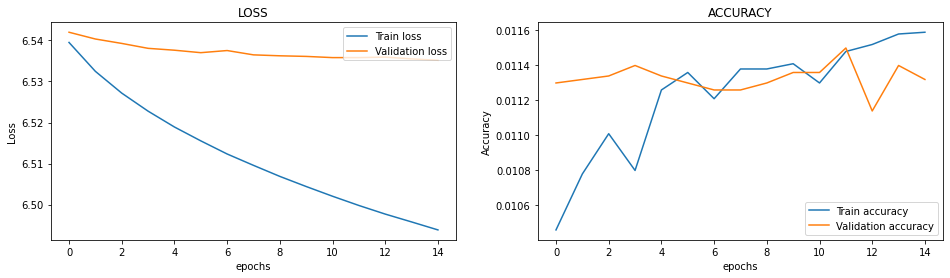




Batch8: Training Data Dim (100000, 8, 8, 3)   Label Data Dim: (100000,)
Epoch 1/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5306 - accuracy: 0.0110 - val_loss: 6.5323 - val_accuracy: 0.0118
Epoch 2/15
667/667 [==============================] - 15s 23ms/step - loss: 6.5239 - accuracy: 0.0111 - val_loss: 6.5308 - val_accuracy: 0.0116
Epoch 3/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5188 - accuracy: 0.0111 - val_loss: 6.5297 - val_accuracy: 0.0116
Epoch 4/15
667/667 [==============================] - 15s 22ms/step - loss: 6.5146 - accuracy: 0.0112 - val_loss: 6.5291 - val_accuracy: 0.0115
Epoch 5/15
667/667 [==============================] - 15s 23ms/step - loss: 6.5110 - accuracy: 0.0113 - val_loss: 6.5286 - val_accuracy: 0.0118
Epoch 6/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5077 - accuracy: 0.0117 - val_loss: 6.5279 - val_accuracy: 0.0118
Epoch 7/15
667/667 [==============================] - 15s 22m

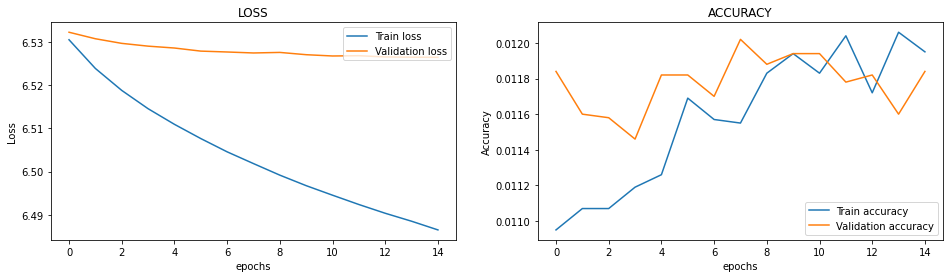




Batch9: Training Data Dim (100000, 8, 8, 3)   Label Data Dim: (100000,)
Epoch 1/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5232 - accuracy: 0.0109 - val_loss: 6.5238 - val_accuracy: 0.0119
Epoch 2/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5172 - accuracy: 0.0111 - val_loss: 6.5220 - val_accuracy: 0.0123
Epoch 3/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5126 - accuracy: 0.0111 - val_loss: 6.5213 - val_accuracy: 0.0122
Epoch 4/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5086 - accuracy: 0.0117 - val_loss: 6.5202 - val_accuracy: 0.0121
Epoch 5/15
667/667 [==============================] - 15s 23ms/step - loss: 6.5051 - accuracy: 0.0117 - val_loss: 6.5198 - val_accuracy: 0.0121
Epoch 6/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5020 - accuracy: 0.0118 - val_loss: 6.5198 - val_accuracy: 0.0119
Epoch 7/15
667/667 [==============================] - 14s 22m

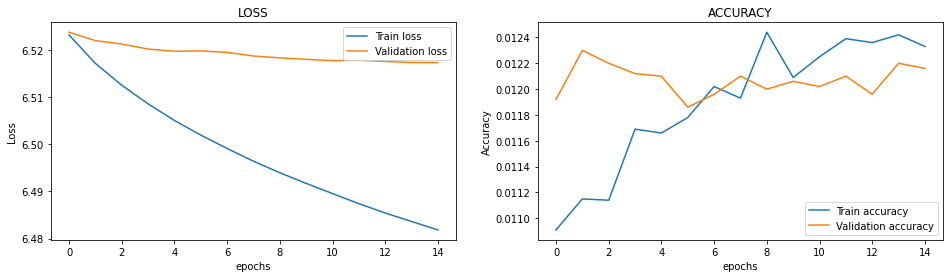




Batch11: Training Data Dim (100000, 8, 8, 3)   Label Data Dim: (100000,)
Epoch 1/15
667/667 [==============================] - 15s 22ms/step - loss: 6.5151 - accuracy: 0.0113 - val_loss: 6.5155 - val_accuracy: 0.0122
Epoch 2/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5097 - accuracy: 0.0114 - val_loss: 6.5141 - val_accuracy: 0.0122
Epoch 3/15
667/667 [==============================] - 15s 22ms/step - loss: 6.5055 - accuracy: 0.0116 - val_loss: 6.5134 - val_accuracy: 0.0123
Epoch 4/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5018 - accuracy: 0.0117 - val_loss: 6.5129 - val_accuracy: 0.0120
Epoch 5/15
667/667 [==============================] - 14s 22ms/step - loss: 6.4986 - accuracy: 0.0117 - val_loss: 6.5126 - val_accuracy: 0.0122
Epoch 6/15
667/667 [==============================] - 15s 22ms/step - loss: 6.4958 - accuracy: 0.0117 - val_loss: 6.5123 - val_accuracy: 0.0123
Epoch 7/15
667/667 [==============================] - 14s 22

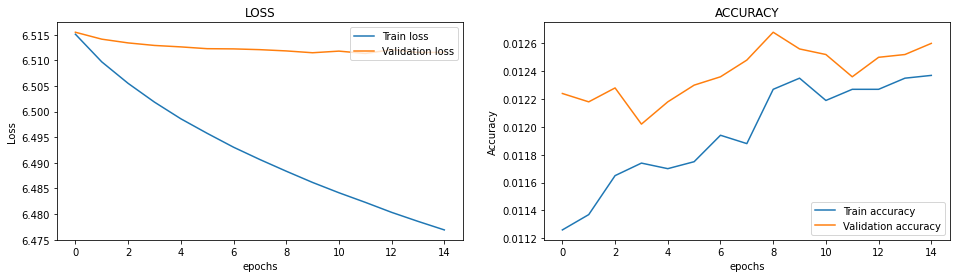




Batch12: Training Data Dim (100000, 8, 8, 3)   Label Data Dim: (100000,)
Epoch 1/15
667/667 [==============================] - 14s 22ms/step - loss: 6.5050 - accuracy: 0.0125 - val_loss: 6.5098 - val_accuracy: 0.0127
Epoch 2/15
667/667 [==============================] - 15s 22ms/step - loss: 6.5000 - accuracy: 0.0126 - val_loss: 6.5086 - val_accuracy: 0.0127
Epoch 3/15
667/667 [==============================] - 14s 22ms/step - loss: 6.4960 - accuracy: 0.0129 - val_loss: 6.5080 - val_accuracy: 0.0126
Epoch 4/15
667/667 [==============================] - 14s 22ms/step - loss: 6.4926 - accuracy: 0.0130 - val_loss: 6.5077 - val_accuracy: 0.0127
Epoch 5/15
667/667 [==============================] - 14s 22ms/step - loss: 6.4896 - accuracy: 0.0128 - val_loss: 6.5071 - val_accuracy: 0.0127
Epoch 6/15
667/667 [==============================] - 15s 22ms/step - loss: 6.4868 - accuracy: 0.0131 - val_loss: 6.5069 - val_accuracy: 0.0127
Epoch 7/15
667/667 [==============================] - 14s 22

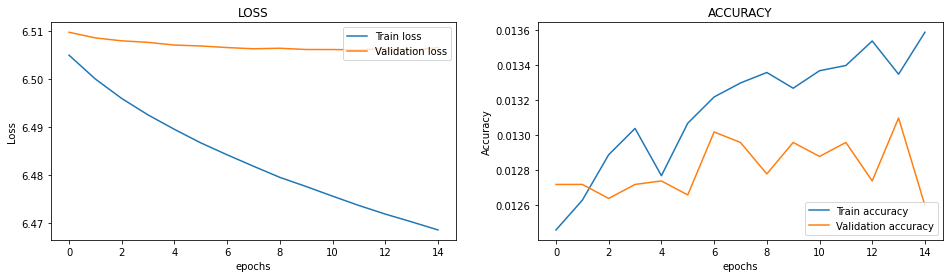




Batch13: Training Data Dim (100000, 8, 8, 3)   Label Data Dim: (100000,)
Epoch 1/15
667/667 [==============================] - 14s 22ms/step - loss: 6.4966 - accuracy: 0.0119 - val_loss: 6.5048 - val_accuracy: 0.0131
Epoch 2/15
667/667 [==============================] - 14s 22ms/step - loss: 6.4921 - accuracy: 0.0123 - val_loss: 6.5033 - val_accuracy: 0.0131
Epoch 3/15
667/667 [==============================] - 15s 22ms/step - loss: 6.4884 - accuracy: 0.0122 - val_loss: 6.5026 - val_accuracy: 0.0133
Epoch 4/15
667/667 [==============================] - 14s 22ms/step - loss: 6.4852 - accuracy: 0.0126 - val_loss: 6.5020 - val_accuracy: 0.0132
Epoch 5/15
667/667 [==============================] - 14s 22ms/step - loss: 6.4823 - accuracy: 0.0127 - val_loss: 6.5016 - val_accuracy: 0.0132
Epoch 6/15
667/667 [==============================] - 15s 22ms/step - loss: 6.4797 - accuracy: 0.0128 - val_loss: 6.5014 - val_accuracy: 0.0132
Epoch 7/15
667/667 [==============================] - 14s 22

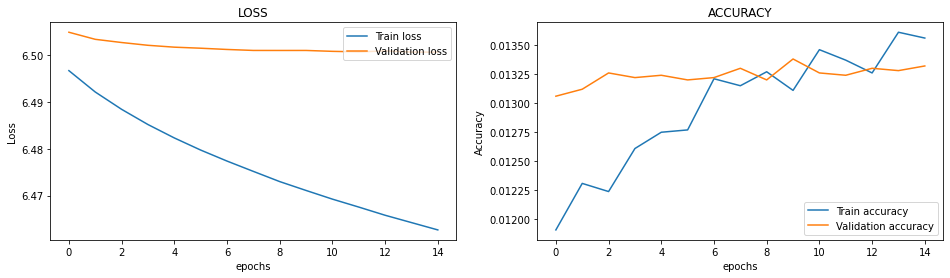

In [4]:
Training_Batch = [1,2,3,4,5,6,7,8,9,11,12,13]
Test_Batch = 10
from keras.callbacks import LearningRateScheduler
from keras import backend as K

#K.set_value(model.optimizer.learning_rate, LR)
epcs = 15


def step_decay_schedule(initial_lr=0.5, decay_factor=0.9, step_size=150):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''
    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch/step_size))
    
    return LearningRateScheduler(schedule)

lr_sched = step_decay_schedule(initial_lr=1e-4, decay_factor=0.75, step_size=2)

for Batch_number in Training_Batch:
    X, Y = Data_Loader(Batch_number)
    X = X[:,:,:,0]    #single channel mode
    Y = tf.one_hot(Y, 1000)


    #TRAIN THE MODEL
    #tr_hist = model.fit(X, Y, batch_size=150, epochs=15, verbose=1, validation_data=(X_Val, Y_Val),callbacks=[lr_sched])
    tr_hist = model.fit(X, Y, batch_size=150, epochs=epcs, verbose=1, validation_data=(X_Val, Y_Val))
    acc = model.evaluate(X_Tst, Y_Tst, verbose=1)    #Test Data Accuracy
    print(f'Accuracy of Test data is: {acc[1]*100} %')

    #Plot graphs
    plt.figure(figsize=(16,4))  
    plt.subplot(1, 2, 1)

    plt.plot(tr_hist.history['loss'],label="Train loss")
    plt.plot(tr_hist.history['val_loss'],label="Validation loss", linestyle='-')
    plt.title('LOSS')
    plt.ylabel('Loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.plot(tr_hist.history['accuracy'],label="Train accuracy")
    plt.plot(tr_hist.history['val_accuracy'],label="Validation accuracy", linestyle='-')
    plt.title('ACCURACY')
    plt.ylabel('Accuracy')
    plt.xlabel('epochs')
    plt.legend(loc='lower right')
    plt.show()
    print()
    print()
    print()

**EXPORT**

In [7]:
BA = model.predict(Val)
BATCH = np.argmax(BA, axis=1)

BATCH=BATCH.astype('int').astype('<U4')
print(BATCH.dtype)
print(BATCH.shape)
print(BATCH)



#Save to CSV

ind = np.arange(1,Val.shape[0]+1, dtype = np.int32)
print(ind.shape)

predictions = pd.DataFrame(BATCH)

column_names = ["Id", "Class"]
combine_DF=pd.DataFrame(columns = column_names)

combine_DF['Id']=ind
combine_DF['Class']=BATCH

compression_opts = dict(method='zip',archive_name='OSAMA_DNN.csv')
combine_DF.to_csv('./OSAMA_DNN_tst2_GPU.zip', index=False,compression=compression_opts)

#combine_DF.to_csv('data1.csv', index = False)            # Export pandas DataFrames to CSV
#combine_DF.to_csv('data2.csv', index = False)

<U4
(48238,)
['549' '549' '226' ... '798' '983' '498']
(48238,)
